In [ ]:
%load_ext sql

In [16]:
# 1.
# !pip install ipython-sql
%pylab inline
import pandas as pd
import yaml
# %load_ext sql

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

cars = pd.read_sql_table('cars', engine)

Populating the interactive namespace from numpy and matplotlib


In [18]:
# 2. returnt the first 7 rows of data

# %%sql

# SELECT TOP 7 * from cars

cars.head(7)

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala


In [41]:
cars[:7]

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala


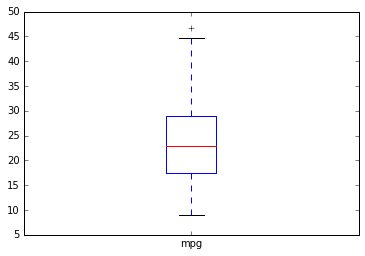

In [42]:
#3. make a boxplot to summarize the variable mpg

# Plot the variables of interest first
cars.plot('weight', 'mpg', kind='box');
# cars.plot('mpg', kind='box');


# df[['Temperature','Humidity']].plot(kind='box')

/Users/justin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


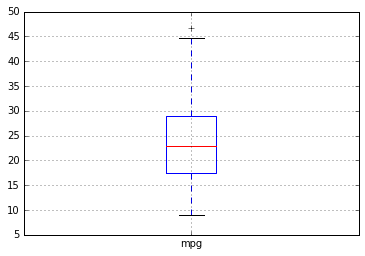

In [45]:
cars.boxplot('mpg');

/Users/justin/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


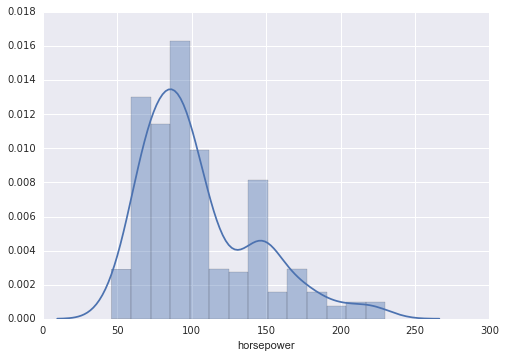

In [47]:
#4. make a histogram to summarize the variable horsepower

cars.hist(['horsepower'],bins=5)

# cars['horsepower'].hist()

/Users/justin/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


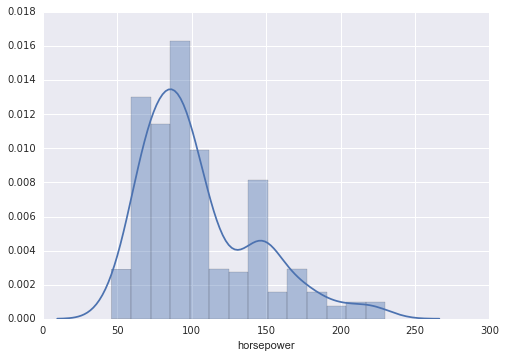

In [49]:
import seaborn as sns

sns.distplot(cars['horsepower'].dropna());

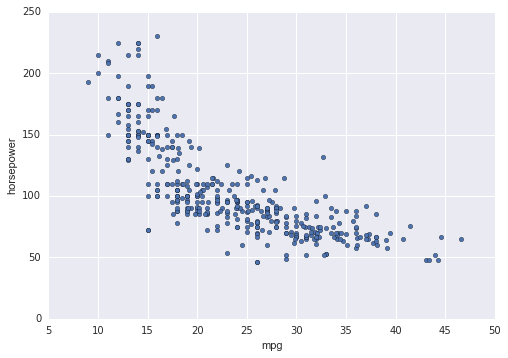

In [51]:
#5. create a scatter plot of mpg vs horsepower

cars.plot('mpg', 'horsepower', kind='scatter');

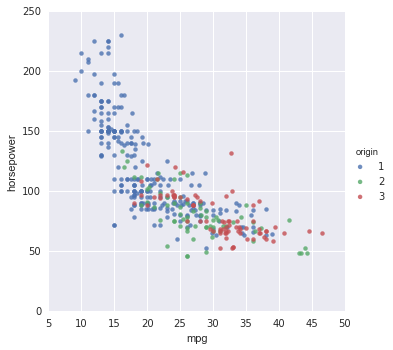

In [53]:
sns.lmplot(x = 'mpg', y='horsepower', hue='origin', data=cars, fit_reg = False)

In [29]:
#6. calculate the avg weight for each model

cars.weight.median()

2803.5

In [55]:
cars.groupby('model')['weight'].mean()

model
70    3372.793103
71    2995.428571
72    3237.714286
73    3419.025000
74    2877.925926
75    3176.800000
76    3078.735294
77    2997.357143
78    2861.805556
79    3055.344828
80    2436.655172
81    2522.931034
82    2453.548387
Name: weight, dtype: float64

In [58]:
# foo = %sql select model, sum(weight)/count(weight) as avg_weight, 

(sqlite3.OperationalError) no such column: model [SQL: 'select model, sum(weight)/count(weight) as avg_weight']


In [63]:
pd.crosstab(cars.origin, cars.cylinders, values=cars.mpg, aggfunc='mean')

cylinders,3,4,5,6,8
origin,,,,,
1,NaN,27.840278,NaN,19.663514,14.963107
2,NaN,28.411111,27.366667,20.100000,NaN
3,20.55,31.595652,NaN,23.883333,NaN


In [56]:
#5. create a contingency table to summarize cylinders and origin.

pd.crosstab(cars['cylinders'], cars['origin'])

origin,1,2,3
cylinders,,,
3,0,0,4
4,72,63,69
5,0,3,0
6,74,4,6
8,103,0,0
